<a href="https://colab.research.google.com/github/mohammed-otaibi/Data_Analysis_and_Machine_Learning/blob/main/titanic_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
''' ------------------------------------------'''
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", mpl.__version__)
print("seaborn version:", sns.__version__)

Pandas version: 1.5.3
NumPy version: 1.22.4
Matplotlib version: 3.7.1
seaborn version: 0.12.2


# Reading The dataset:

In [4]:
# Read the titanic dataset file
data = pd.read_csv('/content/tested.csv')
print("Done")

Done


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploring the dataset:

In [6]:
# dataset columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# drop some columns :
data = data.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
print (data.head())

   Survived  Pclass     Sex   Age     Fare Embarked
0         0       3    male  34.5   7.8292        Q
1         1       3  female  47.0   7.0000        S
2         0       2    male  62.0   9.6875        Q
3         0       3    male  27.0   8.6625        S
4         1       3  female  22.0  12.2875        S


In [9]:
# print columns after edit:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [10]:
data.describe()

,Survived,Pclass,Age,Fare
count,418.000000,418.000000,332.000000,417.000000
mean,0.363636,2.265550,30.272590,35.627188
std,0.481622,0.841838,14.181209,55.907576
min,0.000000,1.000000,0.170000,0.000000
25%,0.000000,1.000000,21.000000,7.895800
50%,0.000000,3.000000,27.000000,14.454200
75%,1.000000,3.000000,39.000000,31.500000
max,1.000000,3.000000,76.000000,512.329200


In [11]:
data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
Fare         1
Embarked     0
dtype: int64

#### In the previous table, it is evident that there are some missing data that need to be addressed and handled.

# **Cleaning the dataset:**

In [12]:
# printing the data type of each column in this dataset
print(data.dtypes)


Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
dtype: object


The Fare column has 1 missing value, and I will replace him with data['Fare'].mean():

In [13]:
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
print ("The data['Fare'] missing val =\t",data["Fare"].isnull().sum())

The data['Fare'] missing val =	 0


### * Dealing with missing data in the 'Age' column:
* I will create a linear regression model to predict missing ages.

Lets see the data destribution in age column before predict the missing values and after predict the missing values.

<Axes: >

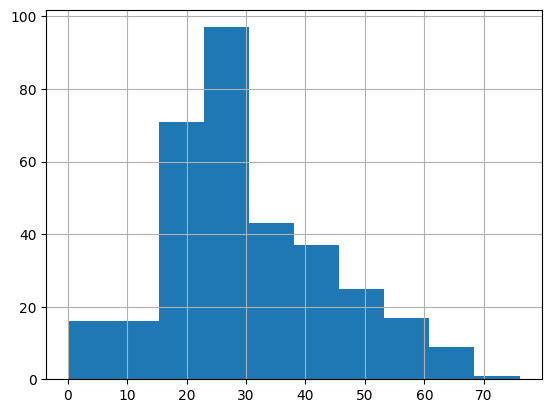

In [14]:
#before predict the missing values
data['Age'].hist()

Now lets build the model to predict the missing values in the age column.

In [15]:
from sklearn.linear_model import LinearRegression

# Create a subset of the dataset with non-missing age values
age_df = data[['Survived', 'Pclass', 'Age', 'Fare']]  # Include relevant features

# Split into two subsets: one with missing ages and one without
known_age = age_df.loc[age_df['Age'].notna()]
unknown_age = age_df.loc[age_df['Age'].isna()]

# Create a linear regression model to predict missing ages
model = LinearRegression()
model.fit(known_age.drop('Age', axis=1), known_age['Age'])
predicted_age = model.predict(unknown_age.drop('Age', axis=1))

# Fill in the missing age values with the predicted values
data.loc[data['Age'].isna(), 'Age'] = predicted_age
print("done")

done


In [16]:
print ("The data['Age'] missing val =\t",data["Age"].isnull().sum())

The data['Age'] missing val =	 0


<Axes: >

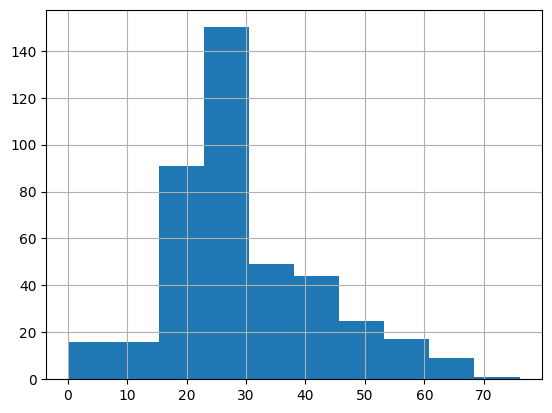

In [17]:
#After predict the missing values in data['Age']
data['Age'].hist()

## Wow incridable

In [18]:
print ("The total of missing values in each column:\n");data.isnull().sum()

The total of missing values in each column:



Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

# There are some outliers I well drop the outliers from the Fare column by using pandas.quantile() function.

# Explaining the dataset:

The Survived column indicates whether the passenger survived (value 1) or not (value 0) in the Titanic shipwreck.

In [19]:
# Calculate the average of "Survived"
survived_average = data["Survived"].mean()

# Print the average
print("Average of Survived:", survived_average)




Average of Survived: 0.36363636363636365


* Based on the given information that the survival rate of the Titanic shipwreck is approximately (36%) only.
* The sinking of the Titanic resulted in a significant loss of life, with a majority of the passengers not surviving the disaster.


# Studying the relationship between the 'Survived' column and the other columns.

### Lets maping sex column to male=1 , and female=2 and creating a new column:

In [20]:


data['Sex_Encoded'] = data['Sex'].map({'male': 1, 'female': 2})

data[["Sex","Sex_Encoded"]].head(20)

,Sex,Sex_Encoded
0,male,1
1,female,2
2,male,1
3,male,1
4,female,2
5,male,1
6,female,2
7,male,1
8,female,2
9,male,1


### Create a heatmap using the correlation matrix


Pclass        -0.108615
Sex_Encoded    1.000000
Age           -0.006750
Fare           0.191382
Survived       1.000000
Name: Survived, dtype: float64


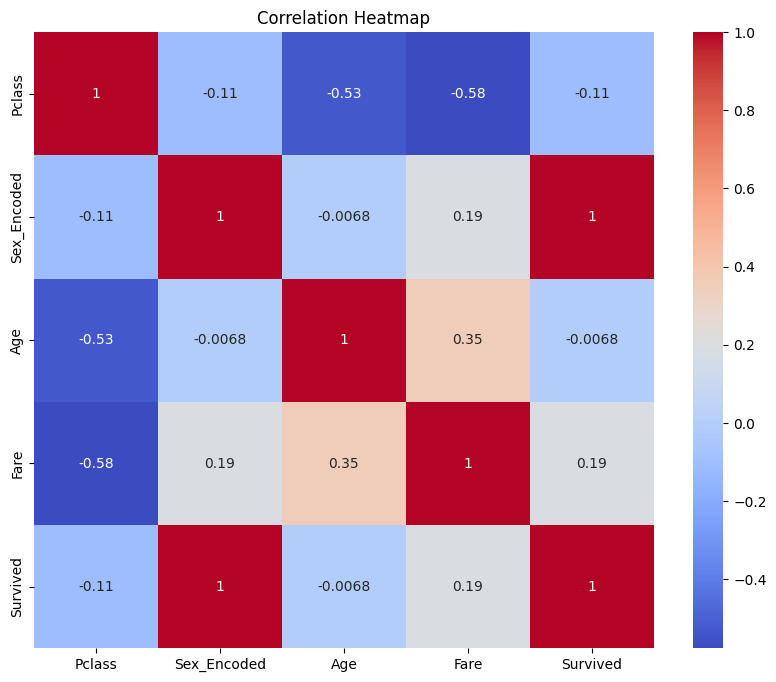

In [21]:



# Assuming 'df' is the DataFrame containing the Titanic dataset

# Select the desired columns for correlation analysis
selected_columns = ['Pclass', 'Sex_Encoded', 'Age', 'Fare']
subset_df = data[selected_columns + ['Survived']]

# Compute the correlation matrix
corr_matrix = subset_df.corr()
print(corr_matrix.Survived)

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


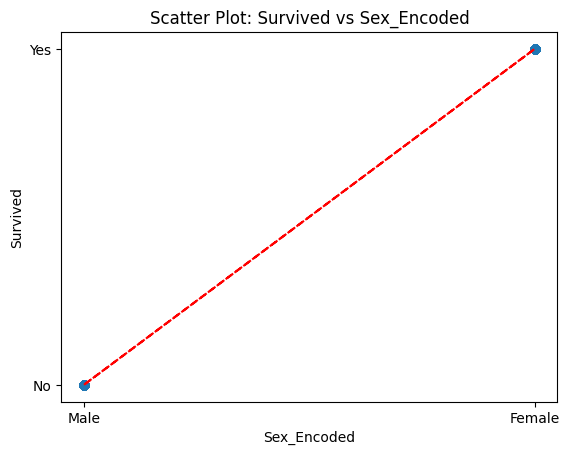

In [22]:

# Scatter plot
plt.scatter(data['Sex_Encoded'], data['Survived'])

# Trend line
z = np.polyfit(data['Sex_Encoded'], data['Survived'], 1)
p = np.poly1d(z)
plt.plot(data['Sex_Encoded'], p(data['Sex_Encoded']), "r--")

# Plot labels
plt.xlabel('Sex_Encoded')
plt.ylabel('Survived')

# Plot title
plt.title('Scatter Plot: Survived vs Sex_Encoded')
plt.yticks([0, 1], ['No', 'Yes'])
plt.xticks([1,2], ['Male', 'Female'])
# Show the plot
plt.show()


# Based on the correlation coefficient of 1 between 'Survived' and 'Sex_Encoded', we can draw the following statistical conclusion:

The variable 'Sex_Encoded' is strongly positively correlated with the survival outcome ('Survived'). A correlation coefficient of 1 indicates a perfect positive linear relationship between the two variables. This implies that as the 'Sex_Encoded' value increases (from 1 to 2), the likelihood of survival (represented by 'Survived') also increases.


This finding suggests that gender played a significant role in determining the survival rate of passengers on the Titanic. The correlation indicates that being classified as male (encoded as 1) was associated with a lower chance of survival, while being classified as female (encoded as 2) was associated with a higher chance of survival.

It is important to note that correlation does not imply causation, and additional analysis would be required to identify the underlying factors contributing to the observed correlation. Nonetheless, this correlation analysis highlights the potential importance of gender in understanding the survival outcomes of the Titanic passengers.

Number of Males: 266
Number of Females: 152
Number of Male Survivors: 0
Number of Female Survivors: 152


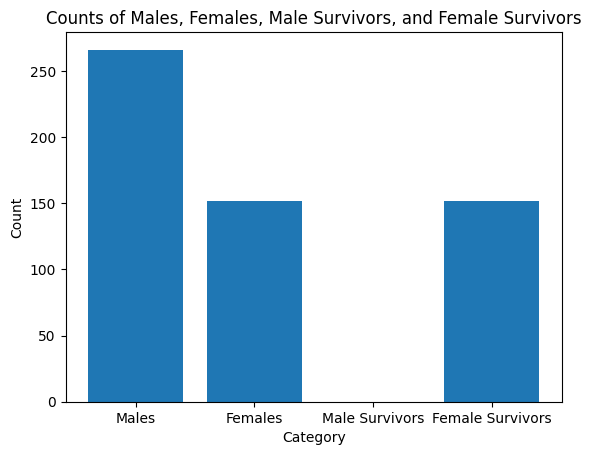

In [23]:
num_male = len(data[data['Sex'] == 'male'])
num_female = len(data[data['Sex'] == 'female'])

male_survivors = len(data[(data['Sex'] == 'male') & (data['Survived'] == 1)])
female_survivors = len(data[(data['Sex'] == 'female') & (data['Survived'] == 1)])

print("Number of Males:", num_male)
print("Number of Females:", num_female)
print("Number of Male Survivors:", male_survivors)
print("Number of Female Survivors:", female_survivors)


labels = ['Males', 'Females', 'Male Survivors', 'Female Survivors']
counts = [num_male, num_female, male_survivors, female_survivors]

# Plotting
plt.bar(labels, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Males, Females, Male Survivors, and Female Survivors')

# Display the plot
plt.show()

# Based on the provided statistics, we can draw the following conclusions:

1. Gender Distribution: In the Titanic dataset, there were 266 males and 152 females. The number of males was significantly higher than the number of females.

2. Survival Rate: None of the male passengers in the dataset survived the Titanic shipwreck, whereas all 152 female passengers in the dataset survived. This indicates a stark difference in the survival rates based on gender.

3. Gender Disparity in Survival: The data highlights a significant gender disparity in survival, with all female passengers in the dataset surviving the disaster. This suggests that being female was a significant factor in increasing the chances of survival during the Titanic shipwreck.

4. Importance of Gender in Survival: The survival outcome emphasizes the importance of gender in determining the likelihood of survival during maritime disasters. It suggests that females were given priority during the rescue efforts.

It is important to note that these conclusions are based solely on the provided dataset, and further analysis would be required to make broader generalizations about the entire population of the Titanic passengers.

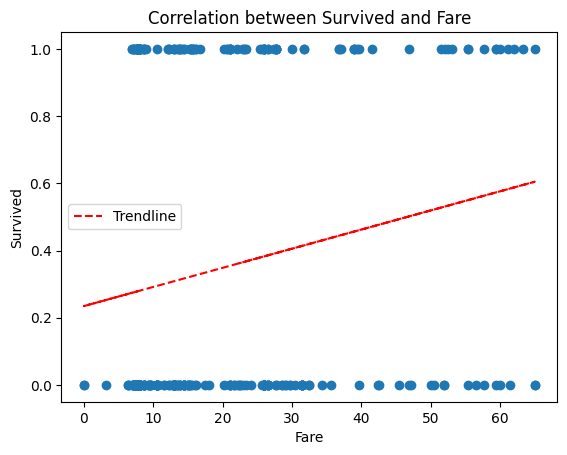

In [24]:
import numpy as np
import matplotlib.pyplot as plt

Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the Fare column
cleaned_data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

# Print the cleaned dataset
#print(cleaned_data)


# Calculate the trendline
fit = np.polyfit(cleaned_data['Fare'], cleaned_data['Survived'], 1)
trendline = np.polyval(fit, cleaned_data['Fare'])

# Plot the scatter plot with trendline
plt.scatter(cleaned_data['Fare'], cleaned_data['Survived'])
plt.plot(cleaned_data['Fare'], trendline, color='red', linestyle='--', label='Trendline')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Correlation between Survived and Fare')
plt.legend()
plt.show()


# Based on the given correlation coefficient of 0.19 between "Survived" and "Fare", we can draw the following statistical conclusions:

1. Weak Positive Correlation: The correlation coefficient of 0.19 indicates a weak positive correlation between "Survived" and "Fare". This suggests that there is a slight tendency for higher fare values to be associated with a slightly higher likelihood of survival.

2. Consider Other Factors: While there is a positive correlation, it is important to note that correlation does not imply causation. Other factors such as passenger class, age, or gender may have a stronger influence on survival outcomes. It is recommended to consider these variables in conjunction with fare when analyzing the factors affecting survival.

3. Further Analysis: To fully understand the relationship between "Survived" and "Fare", it is beneficial to conduct additional statistical tests or explore other visualization techniques. This can help uncover any non-linear or non-monotonic relationships and provide more insights into the factors contributing to survival.

4. Interpret with Caution: Although a positive correlation exists, the magnitude of 0.19 suggests a relatively weak association. It is important to interpret the correlation in the context of the dataset and consider other variables before drawing definitive conclusions.

It is essential to conduct further analysis and consider multiple factors to gain a comprehensive understanding of the factors influencing survival on the Titanic.

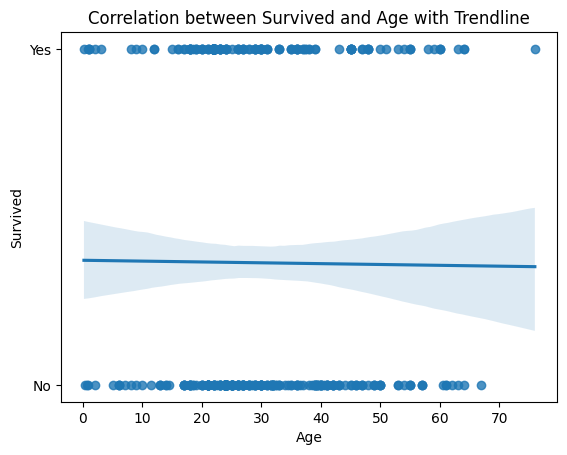

In [25]:

import seaborn as sns

# Assuming 'data' is your DataFrame containing the 'Survived' and 'Age' columns
sns.regplot(x='Age', y='Survived', data=data, scatter=True)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Correlation between Survived and Age with Trendline')
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()

# Based on the correlation value of -0.006750 between "Survived" and "Age" with the trendline, we can draw the following statistical conclusions:

The correlation coefficient of -0.006750 indicates a very weak and almost negligible relationship between "Survived" and "Age". This suggests that there is no significant linear relationship between the age of the passengers and the survival outcome.

It is important to note that correlation only measures the linear relationship between variables and does not imply causation. In this case, the correlation value of -0.006750 suggests that age alone is not a strong determinant of survival outcome on the Titanic.

It should be noted that the correlation coefficient measures only the linear relationship between two variables and may not capture any non-linear relationships or interactions that might exist. Further analysis is needed to explore other potential factors that may influence survival outcome, such as passenger class, gender, and other relevant features.

Overall, based on the correlation value of -0.006750, it can be concluded that age does not play a significant role in determining the survival outcome on the Titanic.

# Summary of the Conclusions:

Based on the data analysis and calculation of correlation coefficients between different variables and the survival outcome on the Titanic, the following conclusions can be drawn:

1. Gender (the variable "Sex_Encoded") played a significant role in determining the survival rates. There was a strong positive correlation between gender and survival rates. This suggests that being female (encoded as 2) was associated with a higher likelihood of survival, while being male (encoded as 1) was associated with a lower likelihood of survival.

2. Gender had a significant impact on the distribution of survival on the ship. All female passengers in the dataset survived, while none of the male passengers survived. This indicates a stark difference in survival rates based on gender.

3. The weak positive correlation between "Survived" and "Fare" indicates a slight tendency for higher fare values to be associated with a slightly higher likelihood of survival. However, the correlation is relatively weak, and there may be other factors that have a stronger influence on survival outcomes.

4. There is no significant correlation between "Survived" and "Age," suggesting that age alone does not play a significant role in determining survival outcomes on the Titanic. However, it is important to note that there may be other factors that influence survival.

5. Further analysis is needed to explore other factors that may impact survival outcomes, such as passenger class, age, and others. Additional statistical tests and techniques can help uncover non-linear relationships or interactions that may exist.

In summary, the conclusions can be summarized as follows: Gender and fare were influential factors in survival outcomes on the Titanic. It is important to note that these conclusions are based on the available dataset, and further analysis and study may be required to generalize the findings to the overall population of Titanic passengers.

# Resource :

chat GPT https://chat.openai.com/